<a href="https://colab.research.google.com/github/rlfwo93/machine-learning/blob/master/linear%20regression_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **선형회귀**

-  직관적으로 말해 데이터의 분포를 잘 설명할 수 있는 직선을 찾아내어 데이터에 존재하지 않는 독립 변수 값에 대한 종속 변수를 예측
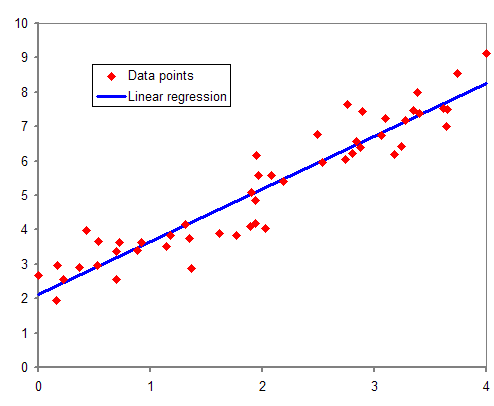




# **경사하강법**

-   함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜 극값(최적값)에 이를 때까지 반복하는 것

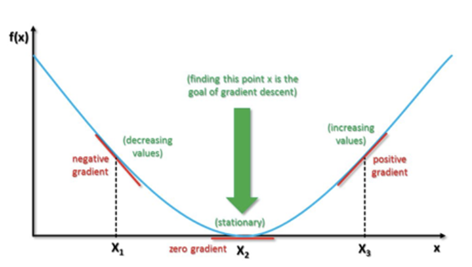

In [ ]:
import tensorflow as tf

tf.__version__

'2.3.0'

In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.3.0


In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 33kB/s 
     |████████████████████████████████| 3.8MB 40.8MB/s 
     |████████████████████████████████| 512kB 43.9MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=717f2874b06348c55954540dbf58698b69b8c4402d5978388b9c2c61bb1554fa
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
import tensorflow as tf

xData = [1, 2, 3, 4, 5, 6, 7] # 하루 노동시간
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000] # 하루 매출

w = tf.Variable(tf.random_uniform([1], -100, 100)) # 가설의 기울기(가중치), -100~100사이 랜덤
b = tf.Variable(tf.random_uniform([1], -100, 100)) # y절편

X = tf.placeholder(tf.float32) # placeholder라는 틀을 만듬
Y = tf.placeholder(tf.float32)

H = w * X + b # 가설 세움

cost = tf.reduce_mean(tf.square(H - Y)) # 비용함수,square(H - Y):예측값에서 실제값을 뺀것의 제곱, reduce_mean: 평균값 구하기

a = tf.Variable(0.01) # 경사하강 알고리즘에서 얼마나 점프할지 스텝의 크기를 정해줌
optimizer = tf.train.GradientDescentOptimizer(a) # tensorflow에서 경사하강 라이브러리 제공

train = optimizer.minimize(cost) # 비용함수를 가장 적에 만드는 방향으로 학습시킴

init = tf.global_variables_initializer() #변수 초기화

sess = tf.Session()
sess.run(init)

for i in range(5001): #에포크 설정
    sess.run(train, feed_dict={X: xData, Y: yData})

    if i % 500 == 0: # 500번에 한번씩 머신러닝이 진행되고있는 과정을 보여줌
        print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), sess.run(w), sess.run(b))

print(sess.run(H, feed_dict={X: [8]})) # 하루에8시간 일했을때의 매출값을 예상해서 보여줌

0 4571432400.0 [10409.983] [2072.1074]
500 8686916.0 [25537.688] [1949.3657]
1000 8633807.0 [25627.531] [1504.4619]
1500 8632678.0 [25640.623] [1439.6361]
2000 8632658.0 [25642.533] [1430.1827]
2500 8632649.0 [25642.807] [1428.8192]
3000 8632650.0 [25642.844] [1428.6328]
3500 8632657.0 [25642.848] [1428.6133]
4000 8632657.0 [25642.848] [1428.6133]
4500 8632657.0 [25642.848] [1428.6133]
5000 8632657.0 [25642.848] [1428.6133]
[206571.39]
